<a href="https://colab.research.google.com/github/JCaballerot/Data_science_for_business/blob/main/regresion_lineal/sidney_data_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerías

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Leyendo data

In [20]:

pddf = pd.read_csv('house_price_data.csv')
target = 'price'

In [71]:
pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
pddf['ant_built'] = pddf.year - pddf.yr_built
pddf['ant_renovated'] = pddf.year - pddf.yr_renovated.apply(lambda x: None if x == 0 else x)


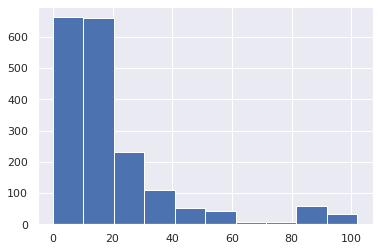

In [73]:
pddf.ant_renovated.hist()

In [79]:
pddf.select_dtypes(include = 'object').columns.tolist()

['date', 'street', 'city', 'statezip', 'country']

In [75]:
set(pddf.columns.tolist()) - set(['price', 'year', 'yr_built', 'yr_renovated'] + pddf.select_dtypes(include = 'object').columns.tolist())

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country',
 'year',
 'ant_built',
 'ant_renovated']

## Analisis univariado y tratamiento de datos

In [31]:
# Creando métricas de las variables

univariate = pddf.describe().transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/pddf.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)




univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0,0.0
1,bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0,0.0
2,bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0,0.0
3,sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0,0.0
4,sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0,0.0


In [56]:
corr_matrix = pddf.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'corr'}, inplace = True)
corr_matrix[['feature', 'corr']]

,feature,corr
0,price,1.000000
1,bedrooms,0.200336
2,bathrooms,0.327110
3,sqft_living,0.430410
4,sqft_lot,0.050451
5,floors,0.151461
6,waterfront,0.135648
7,view,0.228504
8,condition,0.034915
9,sqft_above,0.367570


In [30]:
pddf.shape[0]

4600

In [19]:
pddf.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [7]:
pddf.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

## Analizando el target

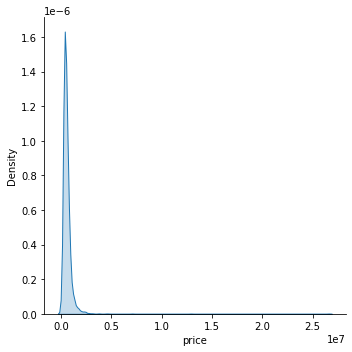

In [8]:
# Gráfico de distribución 
sns.displot(pddf.price, kind="kde", fill=True)

In [9]:
pddf.shape

(4600, 18)

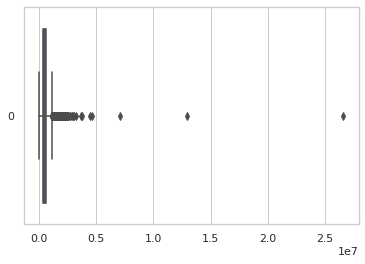

In [10]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price, orient="h")

In [11]:
# Tratamiento por z-score
upper_limit = np.mean(pddf.price) + 3*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 3*np.std(pddf.price)

pddf['price_t'] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)

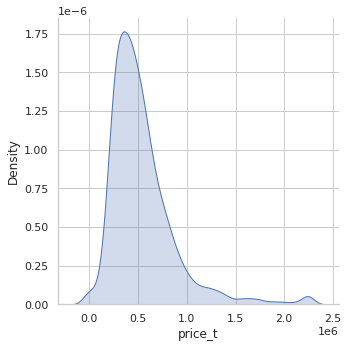

In [12]:
# Gráfico de distribución 
sns.displot(pddf.price_t, kind="kde", fill=True)

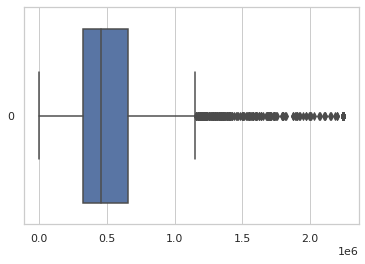

In [13]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price_t, orient="h")

Text(0, 0.5, 'Precio de la vivienda')

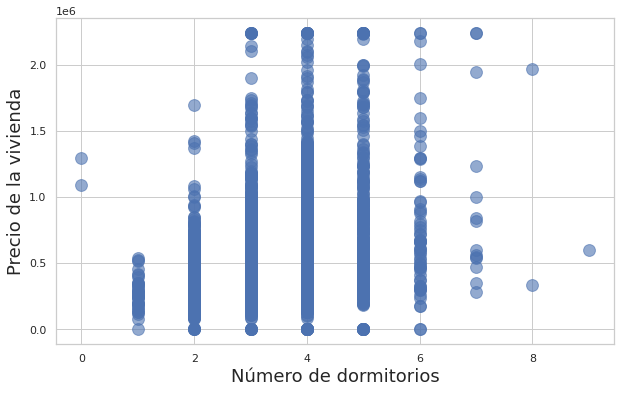

In [14]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(pddf.bedrooms, pddf.price_t, s = 140, alpha = 0.6)
plt.xlabel("Número de dormitorios", fontsize=18)
plt.ylabel("Precio de la vivienda", rotation=90, fontsize=18)

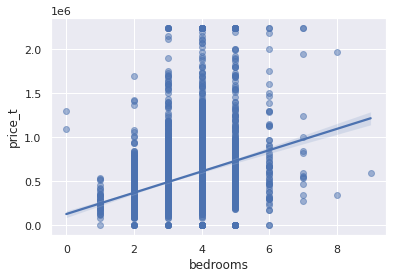

In [15]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.regplot(data = pddf, x="bedrooms", y="price_t", scatter_kws = {'alpha': 0.5})

In [16]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(pddf.price_t, 
             sm.add_constant(pddf[['bedrooms']]))
res = mod.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                price_t   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     542.6
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          1.51e-113
Time:                        13:43:04   Log-Likelihood:                -64830.
No. Observations:                4600   AIC:                         1.297e+05
Df Residuals:                    4598   BIC:                         1.297e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.291e+05   1.83e+04      7.075      0.0